### Filtering mobile phone spam sms uning Naive Bayes Algorithm

##### Read the dataset

In [4]:
sms_raw <- read.csv("sms_spam.csv", stringsAsFactors = FALSE)
head(sms_raw)

type,text
ham,Hope you are having a good week. Just checking in
ham,K..give back my thanks.
ham,Am also doing in cbe only. But have to pay.
spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"
spam,okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm
ham,Aiya we discuss later lar... Pick u up at 4 is it?


In [5]:
str(sms_raw)

'data.frame':	5559 obs. of  2 variables:
 $ type: chr  "ham" "ham" "ham" "spam" ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or Â£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline"| __truncated__ ...


In [6]:
# type variable converted chr to factor
sms_raw$type <- factor(x = sms_raw$type)

In [8]:
str(sms_raw$type)

 Factor w/ 2 levels "ham","spam": 1 1 1 2 2 1 1 1 2 1 ...


In [9]:
table(sms_raw$type)


 ham spam 
4812  747 

In [18]:
round(prop.table(table(sms_raw$type)) * 100, digits = 1)


 ham spam 
86.6 13.4 

#### Data preparation – processing text data for analysis

In [19]:
# Install the text mining package
install.packages("tm")

Installing package into 'C:/Users/Pappu/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Pappu\AppData\Local\Temp\RtmpaoIivk\downloaded_packages


In [20]:
library(tm)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"

In [21]:
# Creating corpus
sms_corpus <- Corpus(VectorSource(sms_raw$text))


In [27]:
print(sms_corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5559


In [31]:
# See the content of the corpus
inspect(sms_corpus[1:3])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3

[1] Hope you are having a good week. Just checking in
[2] K..give back my thanks.                          
[3] Am also doing in cbe only. But have to pay.      


In [32]:
# Cleaning such as punctuations and other character etc.
# Convert to lower case
corpus_clean <- tm_map(sms_corpus, tolower)

Warning message in tm_map.SimpleCorpus(sms_corpus, tolower):
"transformation drops documents"

In [34]:
inspect(corpus_clean[1:3])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3

[1] hope you are having a good week. just checking in
[2] k..give back my thanks.                          
[3] am also doing in cbe only. but have to pay.      


In [35]:
# Remove any numbers
corpus_clean <- tm_map(corpus_clean, removeNumbers)

Warning message in tm_map.SimpleCorpus(corpus_clean, removeNumbers):
"transformation drops documents"

In [39]:
inspect(corpus_clean[1:4])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4

[1] hope you are having a good week. just checking in                                                                          
[2] k..give back my thanks.                                                                                                    
[3] am also doing in cbe only. but have to pay.                                                                                
[4] complimentary  star ibiza holiday or â£, cash needs your urgent collection.  now from landline not to lose out! boxskwpppm+


In [41]:
# use stopwords() function to remove filler words such as um, uh, er, ah, like, okay, right, and you know

In [45]:
head(stopwords(), 50)

[1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"       
[16] "his"        "himself"    "she"        "her"        "hers"      
[21] "herself"    "it"         "its"        "itself"     "they"      
[26] "them"       "their"      "theirs"     "themselves" "what"      
[31] "which"      "who"        "whom"       "this"       "that"      
[36] "these"      "those"      "am"         "is"         "are"       
[41] "was"        "were"       "be"         "been"       "being"     
[46] "have"       "has"        "had"        "having"     "do"

In [46]:
corpus_clean <- tm_map(corpus_clean, removeWords, stopwords())

Warning message in tm_map.SimpleCorpus(corpus_clean, removeWords, stopwords()):
"transformation drops documents"

In [47]:
inspect(corpus_clean[1:4])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4

[1] hope     good week. just checking                                                                        
[2] k..give back  thanks.                                                                                    
[3]  also   cbe .    pay.                                                                                    
[4] complimentary  star ibiza holiday  â£, cash needs  urgent collection.  now  landline   lose ! boxskwpppm+


In [48]:
# Remove punctuation
corpus_clean <- tm_map(corpus_clean, removePunctuation)

Warning message in tm_map.SimpleCorpus(corpus_clean, removePunctuation):
"transformation drops documents"

In [49]:
inspect(corpus_clean[1:4])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4

[1] hope     good week just checking                                                                     
[2] kgive back  thanks                                                                                   
[3]  also   cbe     pay                                                                                  
[4] complimentary  star ibiza holiday  â£ cash needs  urgent collection  now  landline   lose  boxskwpppm


In [50]:
# remove additional whitespaces that are created due to remove numbers, stopwords, punctuations 
corpus_clean <- tm_map(corpus_clean, stripWhitespace)

Warning message in tm_map.SimpleCorpus(corpus_clean, stripWhitespace):
"transformation drops documents"

In [51]:
inspect(corpus_clean[1:4])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4

[1] hope good week just checking                                                                 
[2] kgive back thanks                                                                            
[3]  also cbe pay                                                                                
[4] complimentary star ibiza holiday â£ cash needs urgent collection now landline lose boxskwpppm


In [56]:
#Creating a sparse matrix to split the messages into individual words
sms_dtm <- DocumentTermMatrix(corpus_clean)

In [58]:
str(sms_dtm)

List of 6
 $ i       : int [1:42627] 1 1 1 1 1 2 2 2 3 3 ...
 $ j       : int [1:42627] 1 2 3 4 5 6 7 8 9 10 ...
 $ v       : num [1:42627] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 5559
 $ ncol    : int 7909
 $ dimnames:List of 2
  ..$ Docs : chr [1:5559] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:7909] "checking" "good" "hope" "just" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


#### Data preparation crating training and test datasets

In [60]:
#splitting the raw dataframe
sms_raw_train <- sms_raw[1:4169, ]
sms_raw_test <- sms_raw[4170:5559, ]

In [87]:
head(sms_raw_train)

type,text
ham,Hope you are having a good week. Just checking in
ham,K..give back my thanks.
ham,Am also doing in cbe only. But have to pay.
spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"
spam,okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm
ham,Aiya we discuss later lar... Pick u up at 4 is it?


In [83]:
#splitting the document-term matrix
sms_dtm_train <- sms_dtm[1:4169, ]
sms_dtm_test <- sms_dtm[4170:5559, ]

In [93]:
#splitting the corpus
sms_corpus_train <- corpus_clean[1:4169]
sms_corpus_test <- corpus_clean[4170:5559]

In [97]:
inspect(sms_corpus_train[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] hope good week just checking                                                                        
[2] kgive back thanks                                                                                   
[3]  also cbe pay                                                                                       
[4] complimentary star ibiza holiday â£ cash needs urgent collection now landline lose boxskwpppm       
[5] okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae box cwwx ppm


In [100]:
#confirm that the subsets are representative of the complete set of SMS data
round(prop.table(table(sms_raw_train$type)) * 100, digits = 1)


 ham spam 
86.5 13.5 

In [102]:
round(prop.table(table(sms_raw_test$type)) * 100, digits=1)


 ham spam 
86.8 13.2 

##### Both the training data and test data contain about 13 percent spam.

# Visualizing text data – word clouds

In [103]:
# install wordcloud package
install.packages("wordcloud")

Installing package into 'C:/Users/Pappu/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Pappu\AppData\Local\Temp\RtmpaoIivk\downloaded_packages


In [104]:
library("wordcloud")

Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer


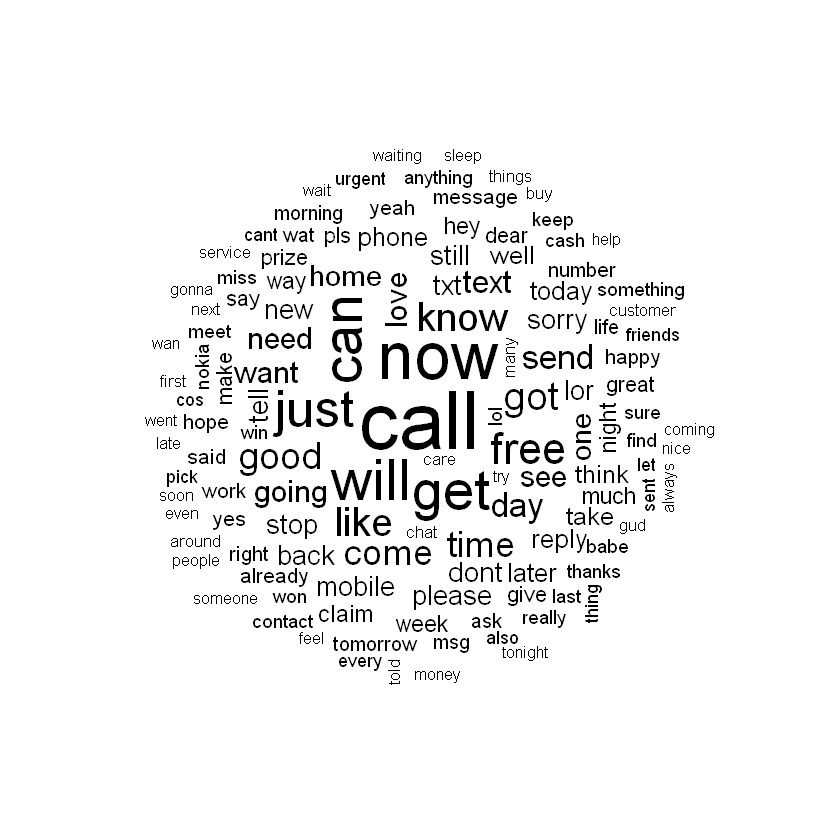

In [122]:
wordcloud(sms_corpus_train, min.freq = 40, random.order = FALSE)

In [126]:
# Create subset of the sms_raw_train for the sms type
spam <- subset(sms_raw_train, type == "spam")
ham <- subset(sms_raw_train, type == "ham")

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"

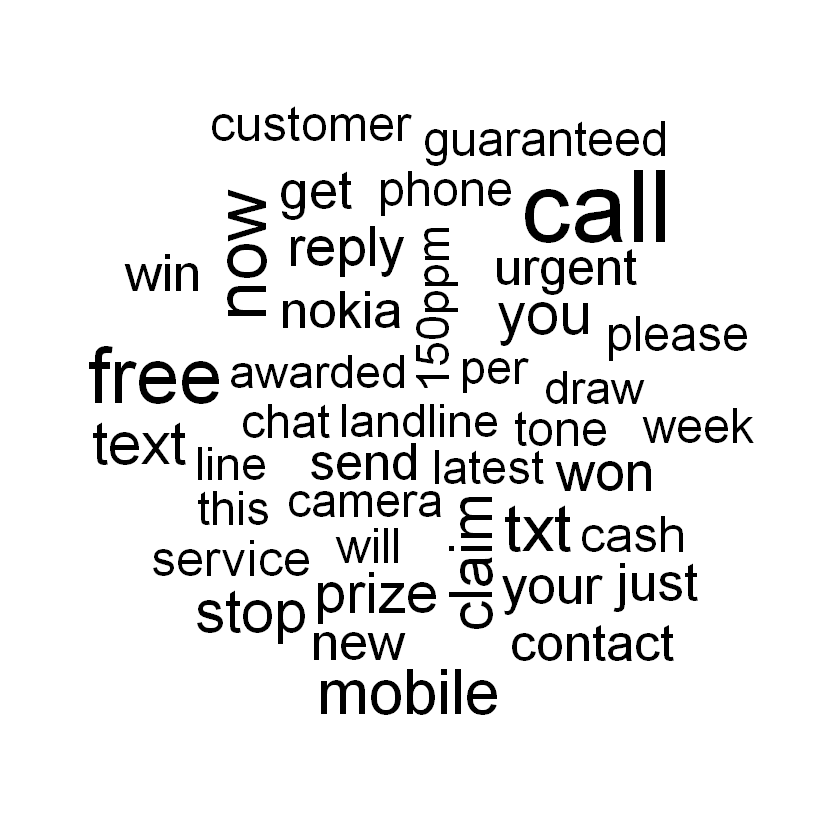

In [144]:
wordcloud(spam$text, max.words = 40, scale = c(5, 2))

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"

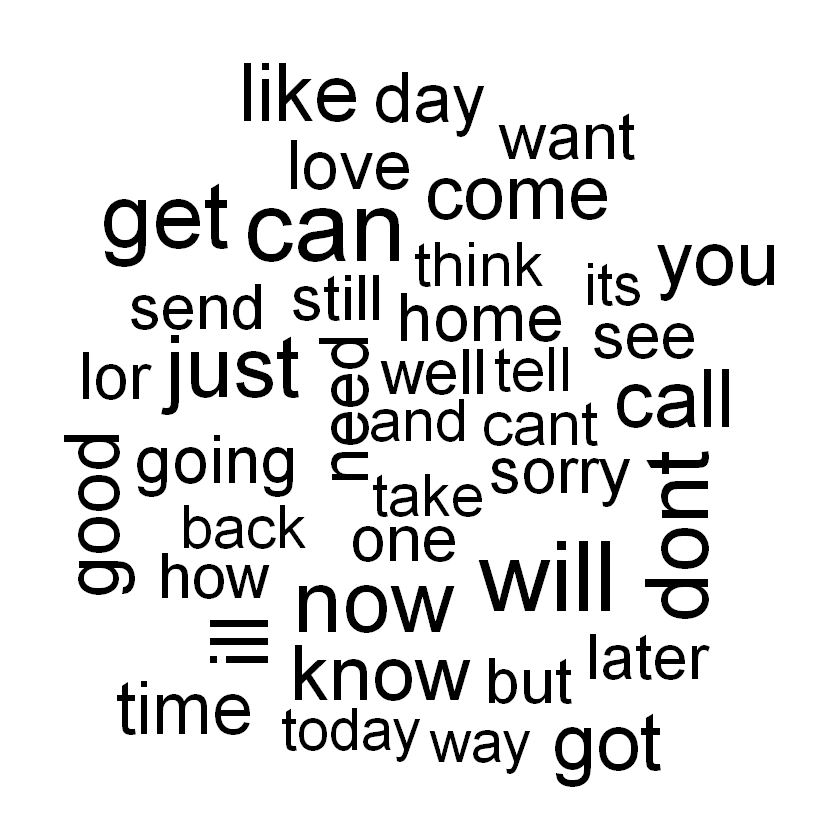

In [151]:
wordcloud(ham$text, max.words = 40, scale = c(5, 2))